<a href="https://colab.research.google.com/github/mehmetgul/neural-nets-and-deep-learning/blob/main/Part_1_Normal_Equation_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HPA1 - Part 1: Linear Regression that using Normal Equation
---

## Problem:
- Given 5 students' aptitude test marks and their grades
- Estimate the line equation using **Normal Equation Method**
- Predict grades for new marks: [65, 75, 77, 83, 87]

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**1. Input Data**
```
Student Marks Grade
1       95   85
2       85   95
3       80   70
4       70   65
5       60   70

In [ ]:
test_marks = np.array([95, 85, 80, 70, 60])  # X values (aptitude test marks)
grades = np.array([85, 95, 70, 65, 70])      # Y values (computed grades)

print(f"Test Marks (X): {test_marks}")
print(f"Grades (Y):     {grades}")
print(f"Number of samples: {len(test_marks)}")

Test Marks (X): [95 85 80 70 60]
Grades (Y):     [85 95 70 65 70]
Number of samples: 5


## 2. Normal Equation Method - Detailed Steps

For linear regression: **y = mx + b**

Normal equation: **β = (X^T X)^(-1) X^T y**

Where:
- X is the design matrix [1, x] for each sample
- β = [b, m]^T (bias and slope)

### Step 1: Create Design Matrix X

In [ ]:
n = len(test_marks)
X = np.column_stack([np.ones(n), test_marks])  # Add column of 1s for bias term
y = grades.reshape(-1, 1)

print("Design Matrix X (with bias column):")
print(X)
print(f"Shape: {X.shape}\n")

print("Target vector y:")
print(y)
print(f"Shape: {y.shape}")

Design Matrix X (with bias column):
[[ 1. 95.]
 [ 1. 85.]
 [ 1. 80.]
 [ 1. 70.]
 [ 1. 60.]]
Shape: (5, 2)

Target vector y:
[[85]
 [95]
 [70]
 [65]
 [70]]
Shape: (5, 1)


### Step 2: Compute X^T (Transpose)

In [ ]:
X_T = X.T
print("X^T (X transpose):")
print(X_T)
print(f"Shape: {X_T.shape}")

X^T (X transpose):
[[ 1.  1.  1.  1.  1.]
 [95. 85. 80. 70. 60.]]
Shape: (2, 5)


### Step 3: Compute X^T * X

In [ ]:
XTX = np.dot(X_T, X)
print("X^T * X:")
print(XTX)
print(f"Shape: {XTX.shape}")

X^T * X:
[[5.000e+00 3.900e+02]
 [3.900e+02 3.115e+04]]
Shape: (2, 2)


### Step 4: Compute (X^T X)^(-1) - Inverse

In [ ]:
XTX_inv = np.linalg.inv(XTX)
print("(X^T * X)^(-1) - Inverse:")
print(XTX_inv)

(X^T * X)^(-1) - Inverse:
[[ 8.53424658e+00 -1.06849315e-01]
 [-1.06849315e-01  1.36986301e-03]]


### Step 5: Compute X^T * y

In [ ]:
XTy = np.dot(X_T, y)
print("X^T * y:")
print(XTy)

X^T * y:
[[  385.]
 [30500.]]


### Step 6: Compute β = (X^T X)^(-1) * X^T * y

In [ ]:
beta = np.dot(XTX_inv, XTy)
print("β (parameters):")
print(beta)

b = beta[0, 0]  # Intercept
m = beta[1, 0]  # Slope

print(f"\nExtracted parameters:")
print(f"Intercept (b) = {b:.6f}")
print(f"Slope (m) = {m:.6f}")

β (parameters):
[[26.78082192]
 [ 0.64383562]]

Extracted parameters:
Intercept (b) = 26.780822
Slope (m) = 0.643836


## 3. Final Line Equation

In [ ]:
print("="*70)
print("FINAL LINEAR EQUATION:")
print("="*70)
print(f"y = {m:.6f}x + {b:.6f}")
print("\nWhere:")
print(f"  y = predicted grade")
print(f"  x = test mark")
print(f"  m (slope) = {m:.6f}")
print(f"  b (intercept) = {b:.6f}")
print("="*70)

FINAL LINEAR EQUATION:
y = 0.643836x + 26.780822

Where:
  y = predicted grade
  x = test mark
  m (slope) = 0.643836
  b (intercept) = 26.780822


## 4. Verification on Training Data

In [ ]:
# Compute predictions for training data
y_pred_train = m * test_marks + b

print(f"{'Test Mark':<15} {'Actual Grade':<15} {'Predicted':<15} {'Error':<10}")
print("-" * 60)
for i in range(len(test_marks)):
    error = abs(grades[i] - y_pred_train[i])
    print(f"{test_marks[i]:<15} {grades[i]:<15.2f} {y_pred_train[i]:<15.4f} {error:<10.4f}")

# Compute R-squared
SS_res = np.sum((grades - y_pred_train)**2)
SS_tot = np.sum((grades - np.mean(grades))**2)
R_squared = 1 - (SS_res / SS_tot)
print(f"\nR² (coefficient of determination): {R_squared:.6f}")
print(f"Model explains {R_squared*100:.2f}% of variance")

Test Mark       Actual Grade    Predicted       Error     
------------------------------------------------------------
95              85.00           87.9452         2.9452    
85              95.00           81.5068         13.4932   
80              70.00           78.2877         8.2877    
70              65.00           71.8493         6.8493    
60              70.00           65.4110         4.5890    

R² (coefficient of determination): 0.480322
Model explains 48.03% of variance


## 5. Predictions for New Test Marks [65, 75, 77, 83, 87]

In [ ]:
# Given marks to predict
new_marks = np.array([65, 75, 77, 83, 87])

# Make predictions using the equation: y = mx + b
predicted_grades = m * new_marks + b

print("Predictions for new test marks:")
print("="*60)
print(f"{'Test Mark':<20} {'Predicted Grade':<20}")
print("-"*60)
for i in range(len(new_marks)):
    print(f"{new_marks[i]:<20} {predicted_grades[i]:<20.4f}")

print("\n" + "="*60)
print(f"Predicted grades array: {predicted_grades}")

Predictions for new test marks:
Test Mark            Predicted Grade     
------------------------------------------------------------
65                   68.6301             
75                   75.0685             
77                   76.3562             
83                   80.2192             
87                   82.7945             

Predicted grades array: [68.63013699 75.06849315 76.35616438 80.21917808 82.79452055]


## 6. Visualization

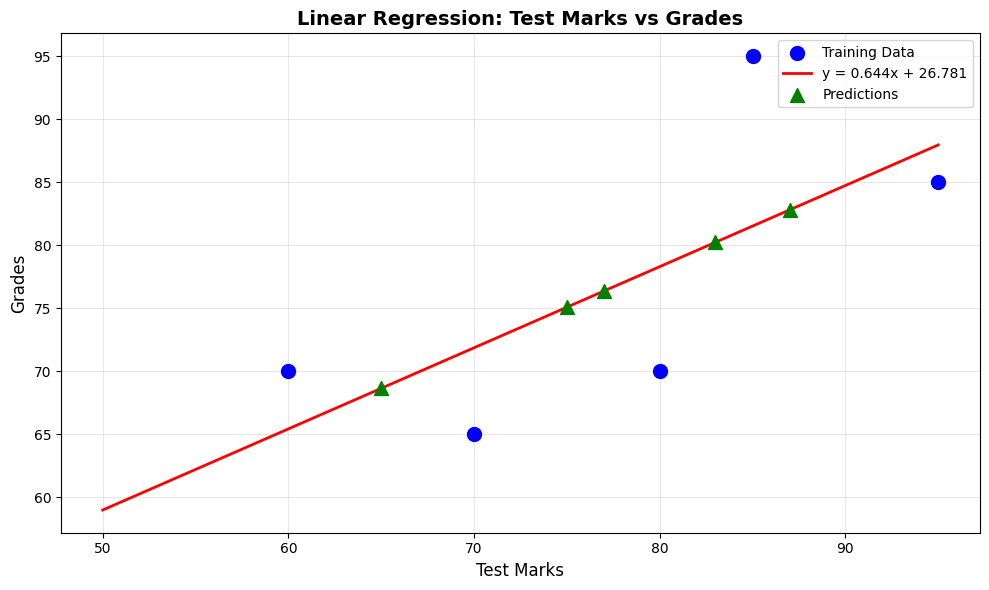

In [ ]:
# Plot the data and regression line
plt.figure(figsize=(10, 6))

# Original training data
plt.scatter(test_marks, grades, color='blue', s=100, label='Training Data', zorder=3)

# Regression line
x_line = np.linspace(50, 95, 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'y = {m:.3f}x + {b:.3f}')

# New predictions
plt.scatter(new_marks, predicted_grades, color='green', s=100, marker='^',
            label='Predictions', zorder=3)

plt.xlabel('Test Marks', fontsize=12)
plt.ylabel('Grades', fontsize=12)
plt.title('Linear Regression: Test Marks vs Grades', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

✅ **Completed:**
1. Created design matrix with bias term
2. Computed X^T (transpose)
3. Computed X^T * X
4. Computed (X^T * X)^(-1)
5. Computed X^T * y
6. Computed β = (X^T * X)^(-1) * X^T * y
7. Extracted line equation parameters
8. Made predictions for new marks

**Final Equation:** y = mx + b  
**Predictions:** [65, 75, 77, 83, 87] → See results above